# Day 21 In-Class Assignment: Image Analysis

### <p style="text-align: right;"> &#9989; Andrew</p>
#### <p style="text-align: right;"> &#9989; Noah, the others</p>

<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1200%2F1*57E5I14kQDRIHLKUWLvAYw.jpeg&f=1" width=500px>

### Goals for this in-class assignment
By the end of this assignment, you should be able to:
* Load images into python as arrays
* Gain some beginning insights how we can access information in 2D numpy arrays which will help us with building agent-based models (coming up in the next assignments!)
* Use array indexing to manipulate, analyze, crop, etc. images

### Assignment instructions

Work with your groupmates to complete this assignment to the best of your abilities. If you have questions about the material, please ask questions. This assignment is very important for preparing you for the upcoming material in this course.

---
## Part 1: Pixel Counting

In this part of the assignment, we are going to do an exercise in counting pixels. Pixel counting can often be a part of image analysis models as a way of measuring what fraction of an image satisfies some condition. Consider the following $225 \times 225$ pixelated image:

Shape of the image is: (225, 225)


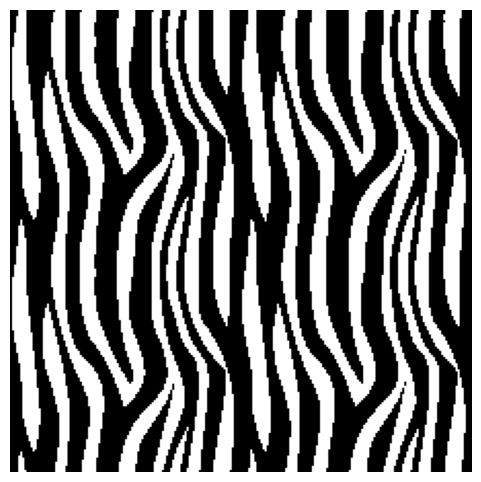

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

zebra = Image.open("zebra.png")
plt.figure(figsize = (6,6))
plt.imshow(zebra, origin = "lower")
plt.axis('off')

zebra_array = np.asarray(zebra).copy()[:,:,0]
print("Shape of the image is:", zebra_array.shape)

For this example, we are going to try and write a piece of code that determines **the fraction of black pixels are touching a white pixel**. 

How do we go about modeling this? If we consider some pixel, $P$, in our image at some coordinate or position in the array( $[i,j]$ or $[row, column]$, whichever convention you prefer), we can look at each of the neighboring pixels that are surrounding it, $N$, by searching a specific set of indices, as shown in the following diagram:

<div align="center"><img src="https://i.ibb.co/zH9YL38/indexing-example.png" alt="indexing-example" border="0" width=300px></div>

Notice that we need both the _position of the pixel as well as the value at that pixel_. In this assignment, we are going to write an algorithm which looks at each pixel, $P$, and if that pixel is a black pixel (which take the value of $0$), then we will check to see if any of the neighboring points, $N$, are a white pixel (which take the value 255). If so, we will count it. 

&#9989;&nbsp; **Do This:** The first thing we need to be cautious of is what happens when we are at the "edge" of our array. If we are in the first or last column or the first or last row, then not all of the neighboring points shown in this diagram will exist. Take for example in the pixel at index $[0,0]$. There is no pixel at $[-1,0]$ or $[0,-1]$ because those are "off" of the image.

As a group, **write a function to see whether an index is on the image or not.** Some of the code has been written for you.

In [5]:
# Finish this code
def onBoard(i, j, image):
    ni = image.shape[0] # number of pixels (height)
    nj = image.shape[1] # number of pixels (width)
    if i <= ni-1 and i >= 0 and j <= nj-1 and j>=0: # You need some more conditions here! 
                                         # We've checked i, but what about j?
        return True
    else:
        return False

&#9989;&nbsp; **Do This:** In order to ensure that your code is working, run the following cell. If your code is right, **all** of the print statements should output "True."

In [6]:
##Some test cases to make sure your code is working correct, all of these should print True
print(onBoard(0,0,zebra_array) == True)
print(onBoard(0,1,zebra_array) == True)
print(onBoard(225,225,zebra_array) == False) # This would indicate that the pixel is off the board
print(onBoard(224,224,zebra_array) == True)
print(onBoard(35,167,zebra_array) == True)
print(onBoard(225,-1,zebra_array) == False) # Another index which is off of the board
print(onBoard(-1,-1,zebra_array) == False) # Another index which is off of the board
print(onBoard(35,260,zebra_array) == False) # "i" is on the board, but "j" is quite off
print(onBoard(35,225,zebra_array) == False) # "i" is on the board, but "j" is just one off

True
True
True
True
True
True
True
True
True


&#9989;&nbsp; **Do This:** Now that your group has a working function to check to see whether an index is a valid index for our image or array, we now need a function that will get the **values** of the neighboring pixels for a given pixel, $P$, *if those neighboring indices are allowable indices*. **Remember**: you need to use the correct indicies to find the values, but your function should not return the indices, it should return a little of the **values** at those locations.

As a group, using your `onBoard` function, **write a function to get the values of neighboring pixels at a given index.** The code has already been started for you.

Before you get coding, answer the following questions with your group:
- What does the neighborhood of each cell look like? 
- How does this neighborhood change for the cells near the edge of the board? 
- How do you access the neighbors of a cell using the index? How do you access the value of each neighbors? How are these different?
    - Think back to the pre-class assignment where you were selecting a column of information. What would change if you wanted to just select a single entry? 

 <font size="+3">&#9998;</font> See the gif below. Border cells are basically surrounded in white

Once you have answered these questions, look at the gif below to help you write the function. The _numbers in the top left represent the index_ while the _number in the center represents the value at that position_. The yellow box is the current position and the dark green boxes represent the available neighbors. The light green boxes are outside of the array. The bottom of the gif shows an example of type of information the getNeighborValues function should return based on the each position. 

<img src=https://media.giphy.com/media/YNNdbEaoJm6amxIPL1/giphy.gif width="600" height="300" align="center">

In [34]:
#Finish this code
def getNeighborValues(i,j, zebra_array):
    # The following list contains the indices of the neighbors for a pixel at (i.j)
    # But remember, we need to check if the neighbor is on the board when we try to get its value!
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0],neighbor[1],zebra_array):
            neighbor_values.append(zebra_array[neighbor])
    #print(neighbor_values)
    return neighbor_values

&#9989;&nbsp;  **Do This:** In order to ensure that your code is working, run the following cell. If your code is right, **all** of the print statements should output "True."

In [28]:
##Some test cases to see if your function is written correctly, these should all print True
print(getNeighborValues(0,0,zebra_array) == [0, 0])
print(getNeighborValues(225,225,zebra_array) == [])
print(getNeighborValues(221,123,zebra_array) == [0,0,0,0])
print(getNeighborValues(75,0,zebra_array) == [0,0,255])
print(getNeighborValues(125,57,zebra_array) == [255,255,255,255])
print(getNeighborValues(125,12,zebra_array) == [255,255,255,0])

True
True
True
True
True
False


&#9989;&nbsp; **Do This:** Now, let's put this altogether. The outline for what we want our model to do is as follows

```
initialize count at 0
initialize tot_black_pixels at 0
for each pixel in our image:
    if the pixel has a value of 0:
        add 1 to tot_black_pixels
        get the neighboring pixels
        if any of them have a value of 255:
            add 1 to count
```

As a group, flesh out this pseudocode, turn it into actual Python code, and **report what percentage of black pixels are next to _at least_ one white pixel.**

Some questions to help you and your group: 
- How can you use the gif above to help you solve this task? 
- How are you going to loop through all the pixels in the image? 
- How are you going to get the value of a cell? 
- How can you get the values of the neighboring cells? 

In [33]:
# Put your code here
count = 0
tot_black_pixels = 0

#print(len(zebra_array))

for i in range(len(zebra_array)):
    for j in range(len(zebra_array[i])):
        #print(zebra_array[i,j])
        if zebra_array[i][j] == 0:
            tot_black_pixels += 1
            neigbors = getNeighborValues(i,j,zebra_array)
            if any(neigbor == 255 for neigbor in neigbors):
                    count += 1
print(tot_black_pixels,count)

28855 7212


&#9989;&nbsp; **Do This:** Now, that you have completed the coding task, write a few sentences below explaining what you accomplished. How would you explain this process to someone who hasn't coded before? Why do we need to access the neighborhood of each cell? What does that neighborhood look like? What is the difference between the index of the cell and the value at that index? 

<font size="+3">&#9998;</font> _Put your answer here_

---
## Part 2: Basic Image Analysis

Now we are going to practice our masking skills with some image analysis. We've included the image from the pre-class to remind you how the arrays that comprise image files are structured!

<img src="https://i.ibb.co/cYRkr2x/image-structure.png" alt="image-structure" border="0" width=800>

Image Credit: Sarah Tymochko


&#9989;&nbsp; **Do This:** Using the code from the pre-class assignment, load in the image `landscape.jpeg` into this notebook. We will be using this image for the following examples. These are meant to help you become more familiar with working with 2D arrays, indexing, masking, etc. When you load in the image, assign it to a variable named `picture`.

In [12]:
## Put your code here


Now that the image has been loaded in, let's separate the red, green, and blue channels into separate 2D arrays.

In [14]:
img_array = np.asarray(picture)
picture_array = img_array.copy() ##We have to make a copy of the array so as to not overwrite the original image
red_array, green_array, blue_array = picture_array[:,:,0], picture_array[:,:,1], picture_array[:,:,2]

&#128721; **STOP!** Review the code cell above. What exactly is going on? How many dimensions are there in the `picture_array` variable? How do you know? How many dimensions are in the color arrays? How do you know? What is the `[:,:,1]` index notation doing?

<font size="+3">&#9998;</font>*Put your answers here.*


Now that the image has been loaded and the red, green, and blue data has been separated, let's look at each component individually.

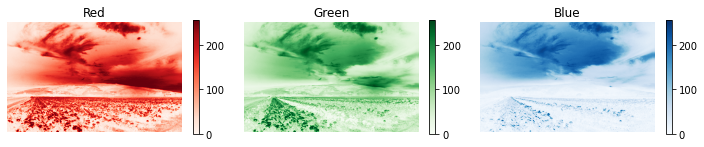

In [15]:
##Make subplot of all three channels at once
plt.figure(figsize=(10,2))
##Red
plt.subplot(1,3,1)
plt.imshow(red_array, cmap = "Reds")
plt.colorbar()
plt.title("Red")
plt.axis('off')

##Green
plt.subplot(1,3,2)
plt.imshow(green_array, cmap = "Greens")
plt.colorbar()
plt.title("Green")
plt.axis('off')


##Blue
plt.subplot(1,3,3)
plt.imshow(blue_array, cmap = "Blues")
plt.colorbar()
plt.title("Blue")
plt.axis('off')

plt.tight_layout()

 &#9989;&nbsp; **Do This:** We are going to try and recreate a popular filter and apply it to our image. Sepia is a filter which edits the image's color to look like the following:

<img src="http://beginnersphoto.weebly.com/uploads/1/0/5/5/10557771/3364426_orig.jpg" width = 400px>

We are going to try and recreate this filter using image processing techniques. Given an input image, we want to create an output image where we have applied the sepia filter. The algorithm to do this is given below. 

```
sepia_r = .393*r + .769*g + .189*b
sepia_g = .349*r + .686*g + .168*b
sepia_b = .272*r + .534*g + .131*b

If any value is greater than 255, set it equal to 255
```


Remember, NumPy arrays are great for applying numerical operations on data. Make a new red, green, and blue channel which represent applying the sepia filter and show the new image using the function from above.

Once you have edited your color channels, use the provided function below to make a composite RGB image. Make sure you give the code a read through and understand what it is doing.

In [16]:
def makeImageFromRGB(red_array, green_array, blue_array):
    image = np.dstack((red_array,green_array,blue_array)).astype(np.uint8)
    plt.figure(figsize = (10,10))
    plt.imshow(image)
    plt.axis('off')

In [17]:
# Put your code here


By separating the color channels, we were able to manipulate each one to recreate an image filter. 

---
## Time permitting: Application of Image Analysis

**If you have time:** These examples that you have been working through so far are nice for getting familiar with working with images as arrays, and working with 2D arrays in general, but rarely do we ever just have to change some color channels and count pixels for no reason. As such, let's consider an example. One way that image analysis is commonly used is for identifying the locations of objects in an image. In this particular example, we are going to be looking at an actual satellite image of people on a public beach. The following code loads in the image.

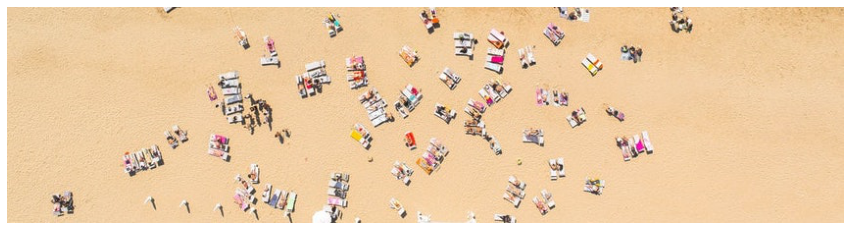

In [19]:
beach = Image.open("beach.jpeg")
plt.figure(figsize = (15,8))
plt.imshow(beach)
plt.axis('off')

beach_array = np.asarray(beach)
beach_array = beach_array.copy()
beach_red, beach_green, beach_blue = beach_array[:,:,0], beach_array[:,:,1], beach_array[:,:,2]

&#9989;&nbsp; **Do This:** With your groupmates, brainstorm how you might use some of the techniques that you have been working with in this assignment and in your work with arrays in general to try and clearly identify where the people are in this image. Write down the results of this brainstorming below as well as any pseudocode your group comes up with.

*Put your brainstorming here*

```
Write your pseudocode here

```

The following code is one way that you could potentially go about solving this problem. **First,** let's create a new array that will mark the locations of all the people:

In [20]:
img_shape = beach_array.shape
just_people = np.zeros(img_shape)
jp_red, jp_green, jp_blue = just_people[:,:,0], just_people[:,:,1], just_people[:,:,2]

Above we used the `np.zeros` function to fill an array with all zeros.  If we visualize this as an image, what do you think we'd see?

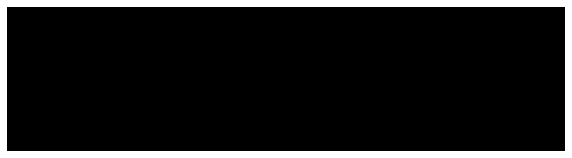

In [21]:
makeImageFromRGB(jp_red, jp_green, jp_blue)

Now let's use a mask to mark where the people are.  **But how do we find the people?** Let's first determine the average pixel value in each of the channels and use that to find outliers.

In [22]:
tolerance = 50
avg_red = beach_red.mean()
avg_green = beach_green.mean()
avg_blue = beach_blue.mean()

Now we can make a mask for each of the red, green and blue channels that checks if the pixel values are farther than `tolerance` away from the mean.

In [23]:
# Check out the | operator.  It acts like "or" to combine two different conditions
mask_red = (beach_red < avg_red - tolerance) | (beach_red > avg_red + tolerance) 
mask_green = (beach_green < avg_green - tolerance) | (beach_green > avg_green + tolerance) 
mask_blue = (beach_blue < avg_blue - tolerance) | (beach_blue > avg_blue + tolerance) 


&#9989;&nbsp; **Do This:** Now apply these three masks to set the `jp_green` array equal to 255 at the outlier positions.  This will mark the people in green!

In [24]:
# code here

**Let's look at the `jp` arrays next to the original picture.  Is it marking the people correctly?**

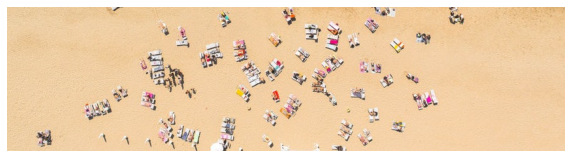

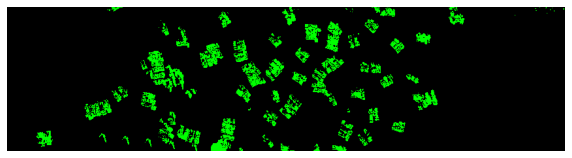

In [26]:
makeImageFromRGB(beach_red, beach_green, beach_blue)
makeImageFromRGB(jp_red, jp_green, jp_blue)

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [36]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University